In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from src_code.support_function import *

# Import data

In [2]:
data_monthly_all = pd.read_csv('./data/data_all_var.csv').set_index('date') # has gov_bond, has VN CPI
data_monthly = pd.read_csv('./data/data_long_month.csv').set_index('date') # no gov_bond, has VN CPI
data_daily_0 = pd.read_csv('./data/data_long.csv').set_index('date') # no gov_bond, no VN CPI
data_daily_noMacro = pd.read_csv('./data/data_short.csv').set_index('date') # has gov_bond, no VN CPI

In [3]:
# Data shape
print(f"Monthly data all variables: {data_monthly_all.shape}")
print(f"Monthly data without Government Bond: {data_monthly.shape}")
print(f"Daily data without macro variables: {data_daily_noMacro.shape}")
print(f"Daily data without Government Bond and CPI: {data_daily_0.shape}")

Monthly data all variables: (90, 7)
Monthly data without Government Bond: (261, 6)
Daily data without macro variables: (1817, 6)
Daily data without Government Bond and CPI: (5103, 5)


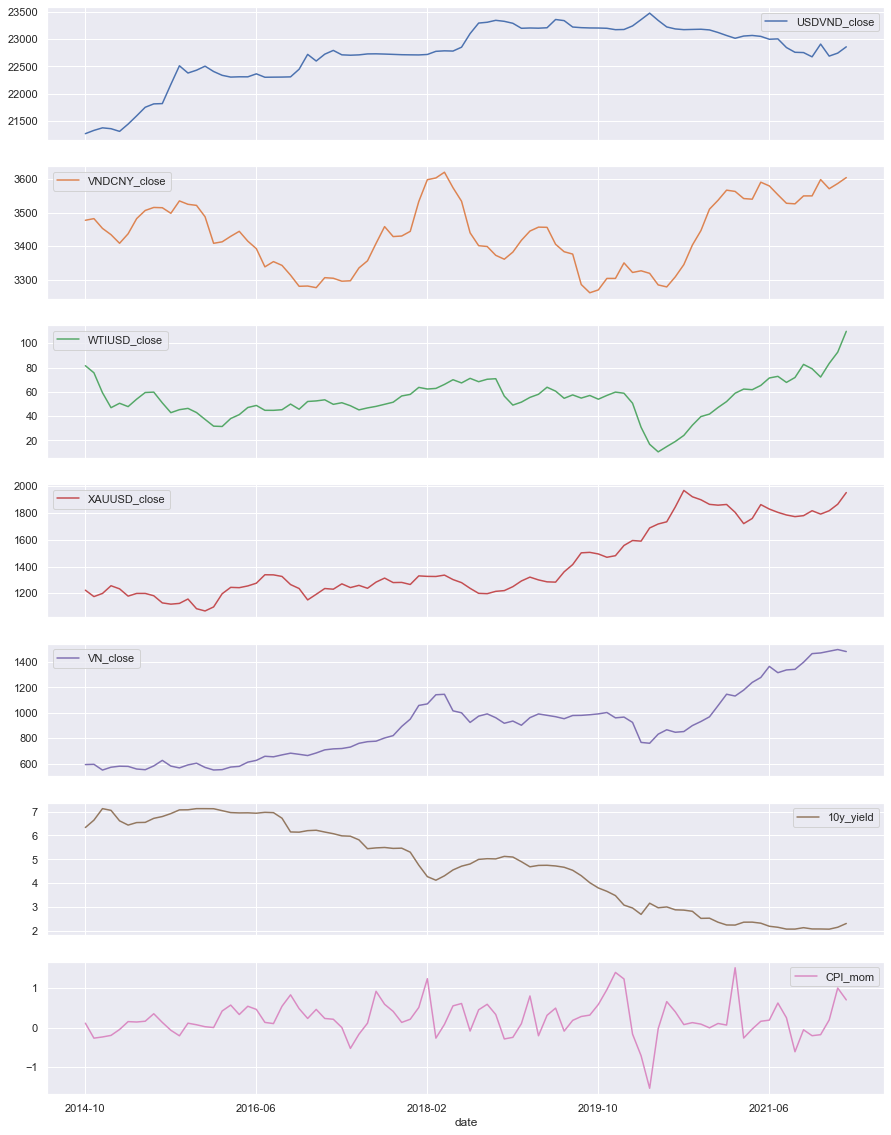

In [4]:
data_monthly_all.plot(kind = 'line', figsize = (15,20), subplots = True)
plt.show();

# Windowed Correlation

In [5]:
list_correlation = list()

In [6]:
data_monthly_all_pctChange = data_monthly_all.copy()
data_monthly_all_pctChange[data_monthly_all_pctChange.columns.difference(['CPI_mom'])] = data_monthly_all_pctChange[data_monthly_all_pctChange.columns.difference(['CPI_mom'])].pct_change()
data_monthly_all_pctChange.index = pd.DatetimeIndex(data_monthly_all_pctChange.index)
data_monthly_all_pctChange.index = data_monthly_all_pctChange.index.to_period("M")
data_monthly_all_pctChange = data_monthly_all_pctChange.dropna()
data_monthly_all_pctChange

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,10y_yield,CPI_mom
date,,,,,,,
2014-11,0.002814,0.001412,-0.071462,-0.039095,0.003369,0.048642,-0.2700
2014-12,0.002195,-0.008316,-0.216584,0.019869,-0.076246,0.072358,-0.2400
2015-01,-0.000739,-0.005393,-0.207837,0.048117,0.040954,-0.010043,-0.2000
2015-02,-0.002293,-0.007435,0.077188,-0.018435,0.014090,-0.062069,-0.0500
2015-03,0.006265,0.008270,-0.054328,-0.044125,-0.002719,-0.026823,0.1500
...,...,...,...,...,...,...,...
2021-11,-0.003429,0.000013,-0.043299,0.020759,0.048652,-0.025019,-0.2078
2021-12,0.010298,0.013628,-0.086465,-0.013909,0.003699,-0.000526,-0.1816
2022-01,-0.009612,-0.007553,0.154829,0.014007,0.009150,-0.003731,0.1916


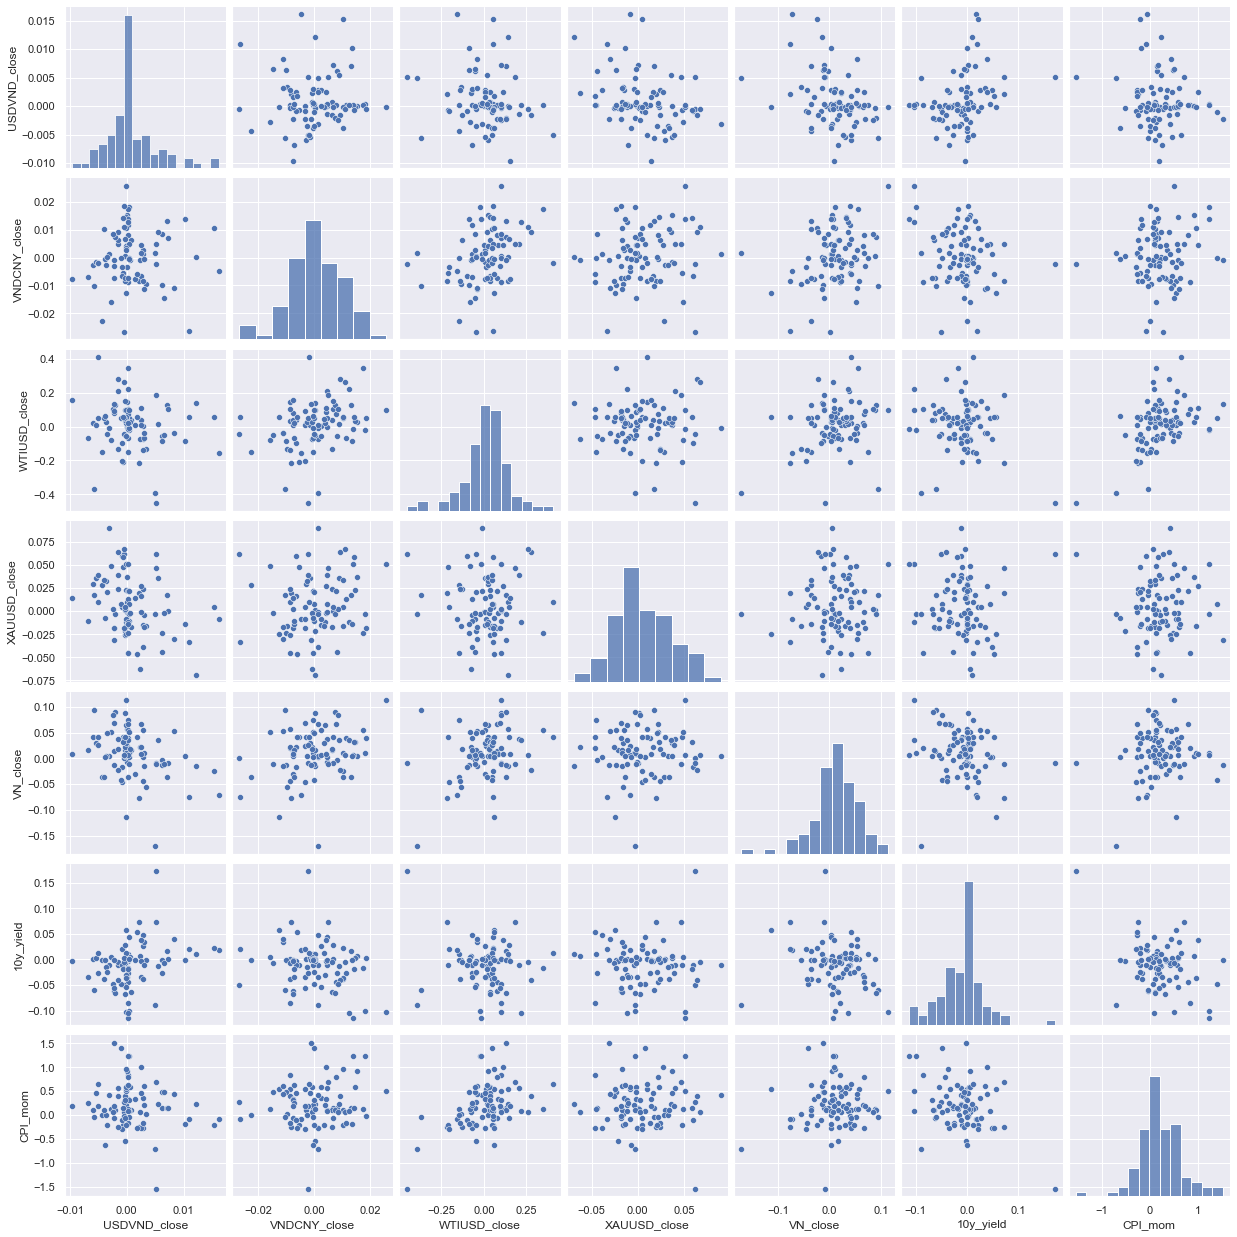

In [7]:
sns.pairplot(data_monthly_all_pctChange);

In [8]:
data_monthly_pctChange = data_monthly.copy()
data_monthly_pctChange[data_monthly_pctChange.columns.difference(['CPI_mom'])] = data_monthly_pctChange[data_monthly_pctChange.columns.difference(['CPI_mom'])].pct_change()
data_monthly_pctChange.index = pd.DatetimeIndex(data_monthly_pctChange.index)
data_monthly_pctChange.index = data_monthly_pctChange.index.to_period("M")
data_monthly_pctChange = data_monthly_pctChange.dropna()
data_monthly_pctChange

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,CPI_mom
date,,,,,,
2000-08,0.000914,0.000865,0.141199,-0.009433,0.108276,0.1000
2000-09,0.004032,0.004157,0.084611,-0.003616,0.037389,-0.2000
2000-10,0.018334,0.018344,-0.032018,-0.013589,0.117583,0.1000
2000-11,0.003261,0.003406,0.045222,-0.015213,0.205458,0.9000
2000-12,0.004539,0.004555,-0.166469,0.023481,0.198826,0.1000
...,...,...,...,...,...,...
2021-11,-0.003429,0.000013,-0.043299,0.020759,0.048652,-0.2078
2021-12,0.010440,0.013703,-0.087233,-0.014363,0.003569,-0.1816
2022-01,-0.009750,-0.007626,0.155800,0.014474,0.009280,0.1916


<AxesSubplot:xlabel='date'>

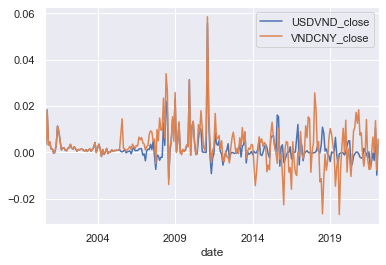

In [123]:
data_monthly_pctChange[['USDVND_close','VNDCNY_close']].plot()

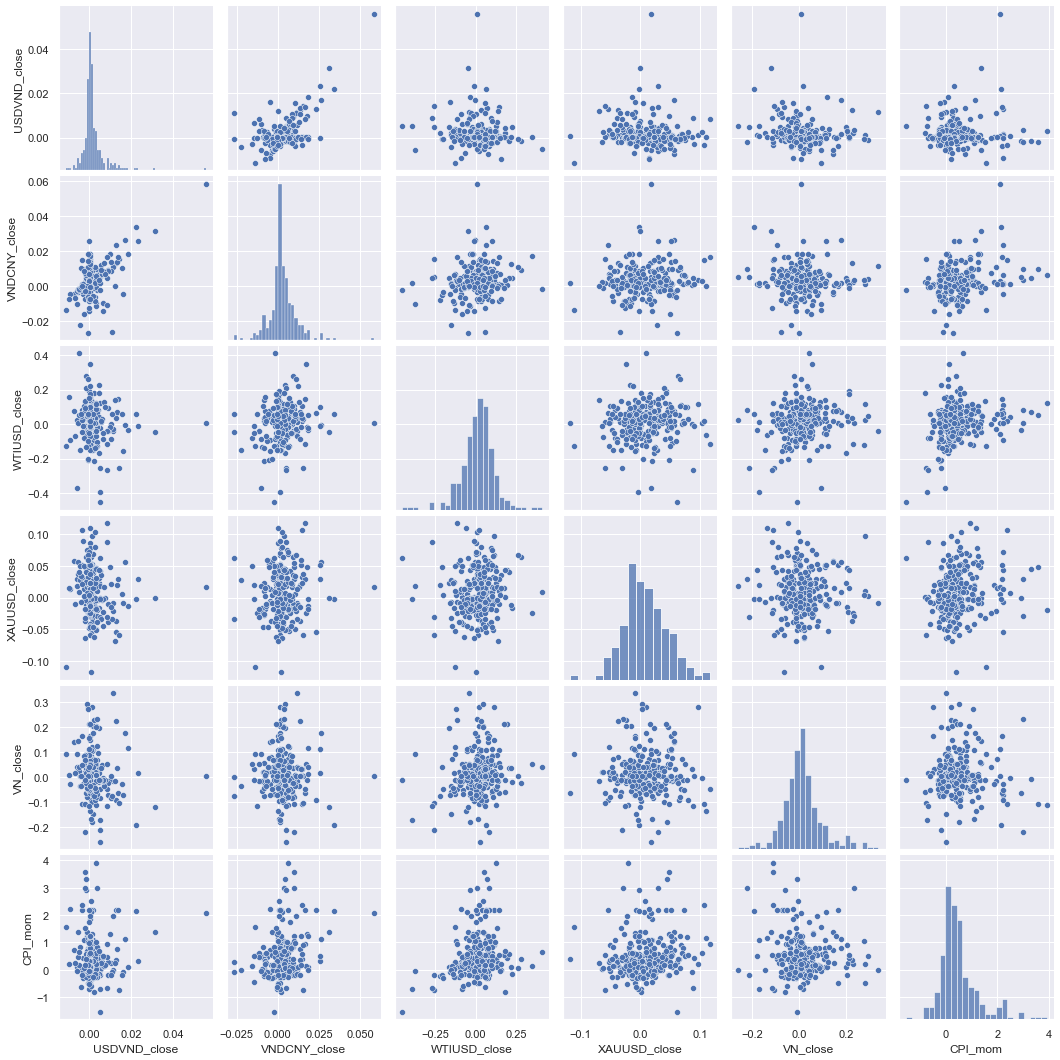

In [9]:
sns.pairplot(data_monthly_pctChange);

### commodity vs fx rate

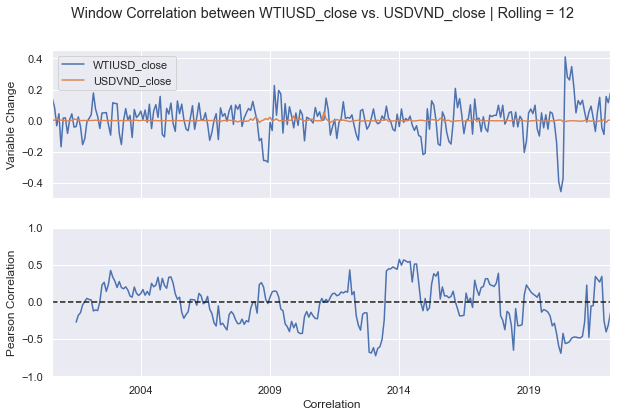

In [10]:
wti_usdvnd_corr = plot_windowCorrelation(data_monthly_pctChange, "WTIUSD_close", "USDVND_close", name_plot = None, r_window_size = 12)

In [11]:
list_correlation.append(wti_usdvnd_corr)

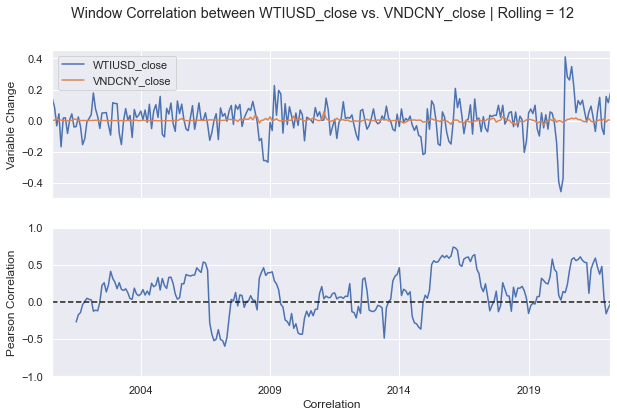

In [12]:
wti_vndcny_corr = plot_windowCorrelation(data_monthly_pctChange, "WTIUSD_close", "VNDCNY_close", name_plot = None, r_window_size = 12)

In [13]:
list_correlation.append(wti_vndcny_corr)

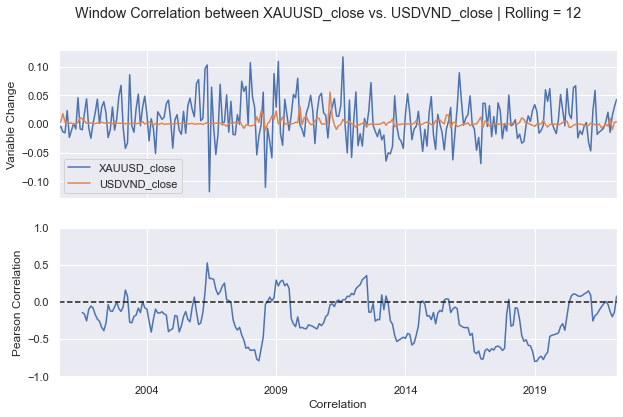

In [14]:
xau_usdvnd_corr = plot_windowCorrelation(data_monthly_pctChange, "XAUUSD_close", "USDVND_close", name_plot = None, r_window_size = 12)

In [15]:
list_correlation.append(xau_usdvnd_corr)

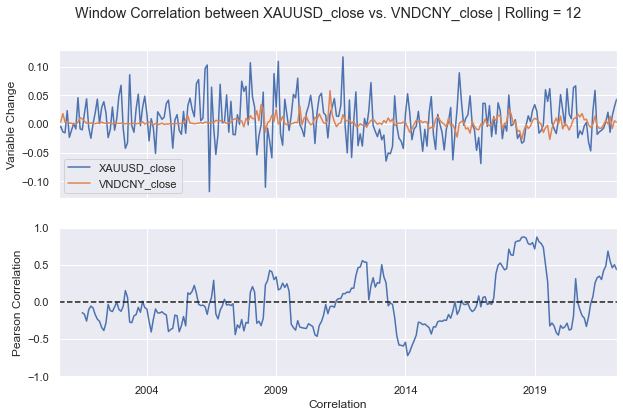

In [16]:
xau_vndcny_corr = plot_windowCorrelation(data_monthly_pctChange, "XAUUSD_close", "VNDCNY_close", name_plot = None, r_window_size = 12)

In [17]:
xau_vndcny_corr.index

PeriodIndex(['2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01',
             '2001-02', '2001-03', '2001-04', '2001-05',
             ...
             '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11',
             '2021-12', '2022-01', '2022-02', '2022-03'],
            dtype='period[M]', name='date', length=260, freq='M')

In [18]:
list_correlation.append(xau_vndcny_corr)

### commodity vs vnindex

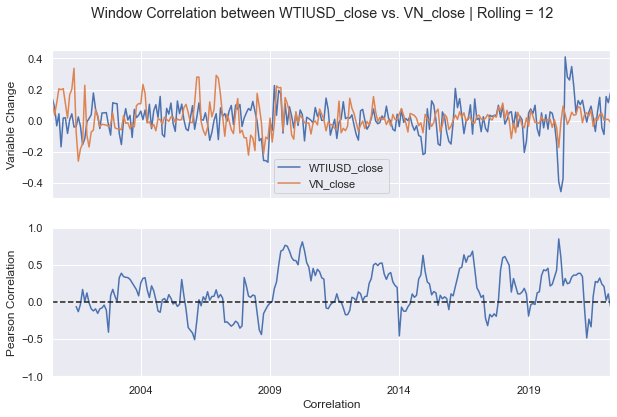

In [19]:
wti_vni_corr = plot_windowCorrelation(data_monthly_pctChange, "WTIUSD_close", "VN_close", name_plot = None, r_window_size = 12)

In [20]:
list_correlation.append(wti_vni_corr)

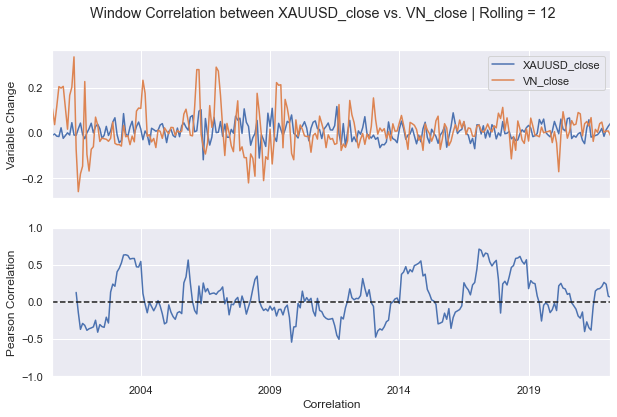

In [21]:
xau_vni_corr = plot_windowCorrelation(data_monthly_pctChange, "XAUUSD_close", "VN_close", name_plot = None, r_window_size = 12)

In [22]:
list_correlation.append(xau_vni_corr)

## fx vs vnindex

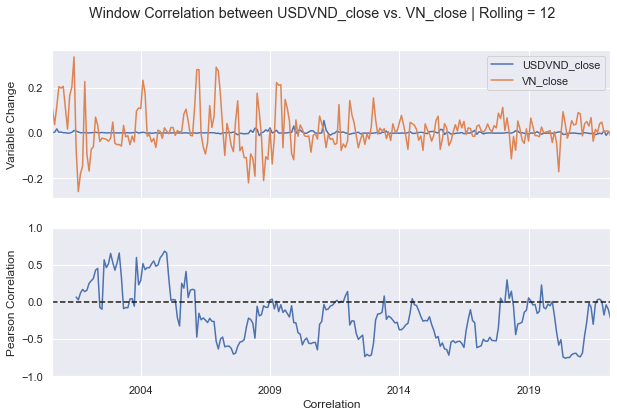

In [120]:
usdnvd_vni_corr = plot_windowCorrelation(data_monthly_pctChange, "USDVND_close", "VN_close", name_plot = None, r_window_size = 12)

In [128]:
usdnvd_vni_corr

,USDVND_close_vs_VN_close
date,
2000-08,NaN
2000-09,NaN
2000-10,NaN
2000-11,NaN
2000-12,NaN
...,...
2021-11,0.011895
2021-12,-0.172915
2022-01,-0.036119


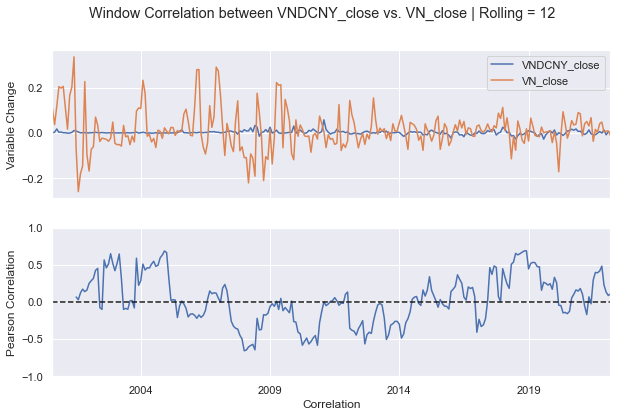

In [121]:
vndcny_vni_corr = plot_windowCorrelation(data_monthly_pctChange, "VNDCNY_close", "VN_close", name_plot = None, r_window_size = 12)

In [130]:
vndcny_vni_corr

,VNDCNY_close_vs_VN_close
date,
2000-08,NaN
2000-09,NaN
2000-10,NaN
2000-11,NaN
2000-12,NaN
...,...
2021-11,0.487043
2021-12,0.230620
2022-01,0.135941


In [124]:
list_correlation.append(usdnvd_vni_corr)
list_correlation.append(vndcny_vni_corr)

## with tpcp

### commodity vs Gov bond

In [23]:
data_daily_noMacro_pctChange = data_daily_noMacro.pct_change().dropna()
data_daily_noMacro_pctChange.index = pd.DatetimeIndex(data_daily_noMacro_pctChange.index)
data_daily_noMacro_pctChange = data_daily_noMacro_pctChange.resample('M').sum()
data_daily_noMacro_pctChange.index = data_daily_noMacro_pctChange.index.to_period("M")
data_daily_noMacro_pctChange

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,10y_yield
date,,,,,,
2014-10,0.001177,0.002943,-0.024495,-0.059219,0.020244,0.015958
2014-11,0.003414,-0.001553,-0.191579,-0.004161,-0.058090,0.085957
2014-12,0.001646,-0.008509,-0.199505,0.016218,-0.035315,0.037659
2015-01,-0.003287,-0.010307,-0.104931,0.082216,0.055173,-0.071571
2015-02,0.001562,-0.001550,0.044106,-0.055538,0.029012,-0.030176
...,...,...,...,...,...,...
2021-12,0.006134,0.007995,0.118204,0.030647,0.014648,0.004967
2022-01,-0.007897,-0.009172,0.151976,-0.020125,-0.011238,-0.004647
2022-02,0.007050,0.015292,0.106017,0.063792,0.008032,0.069684


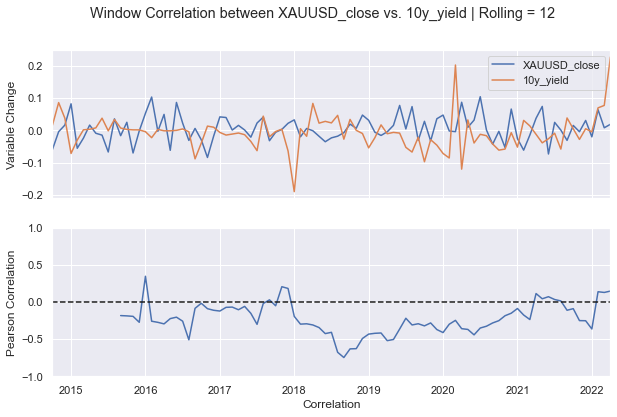

In [24]:
xau_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "XAUUSD_close", "10y_yield", name_plot = None, r_window_size = 12)

In [25]:
list_correlation.append(xau_vnbond_corr)

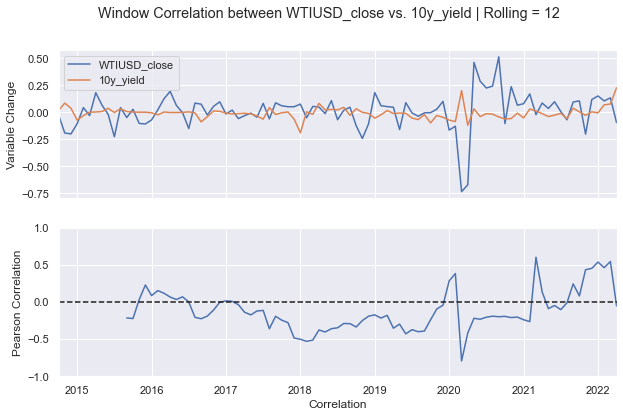

In [26]:
wti_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "WTIUSD_close", "10y_yield", name_plot = None, r_window_size = 12)

In [27]:
list_correlation.append(wti_vnbond_corr)

### fx vs gov bond

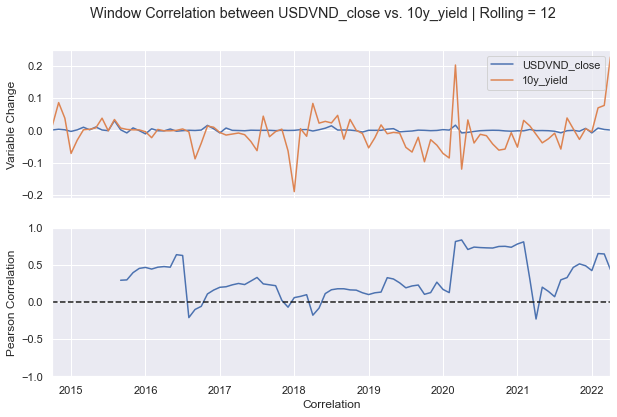

In [28]:
usdvnd_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "USDVND_close", "10y_yield", name_plot = None, r_window_size = 12)

In [29]:
list_correlation.append(usdvnd_vnbond_corr)

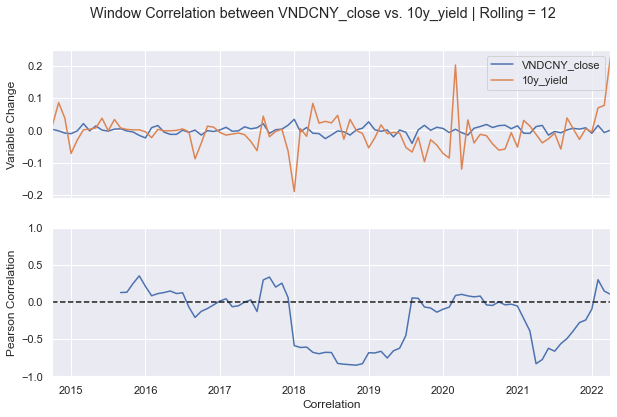

In [30]:
vndcny_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "VNDCNY_close", "10y_yield", name_plot = None, r_window_size = 12)

In [31]:
list_correlation.append(vndcny_vnbond_corr)

### vni vs gov bond

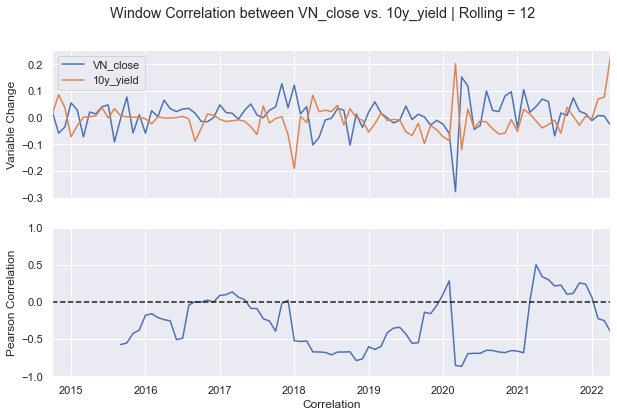

In [32]:
vni_vnbond_corr = plot_windowCorrelation(data_daily_noMacro_pctChange, "VN_close", "10y_yield", name_plot = None, r_window_size = 12)

In [33]:
list_correlation.append(vni_vnbond_corr)

## with cpi

### commodity vs cpi

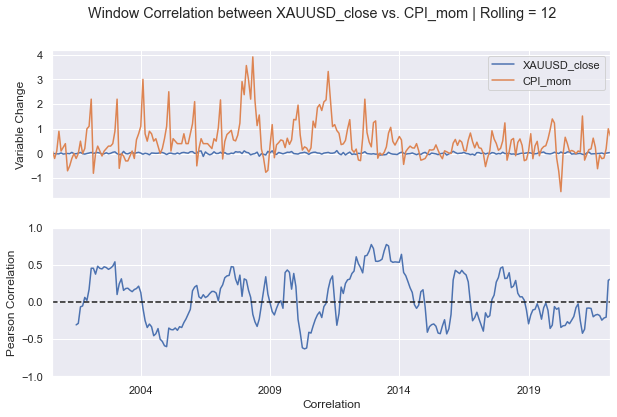

In [34]:
xau_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "XAUUSD_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [35]:
list_correlation.append(xau_cpi_corr)

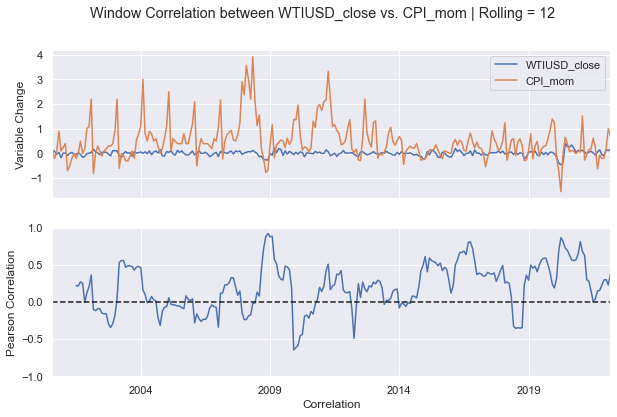

In [36]:
wti_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "WTIUSD_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [37]:
list_correlation.append(wti_cpi_corr)

### fx vs cpi

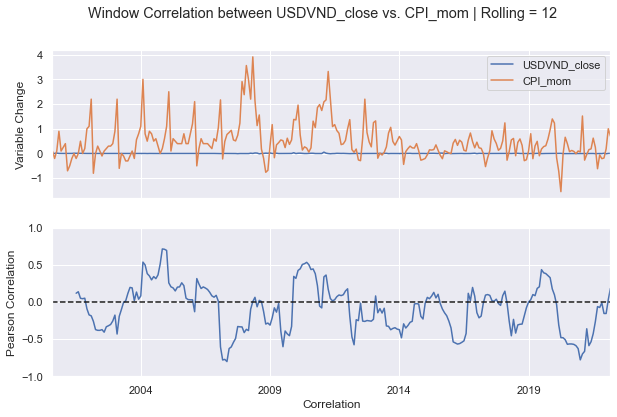

In [38]:
usdvnd_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "USDVND_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [39]:
list_correlation.append(usdvnd_cpi_corr)

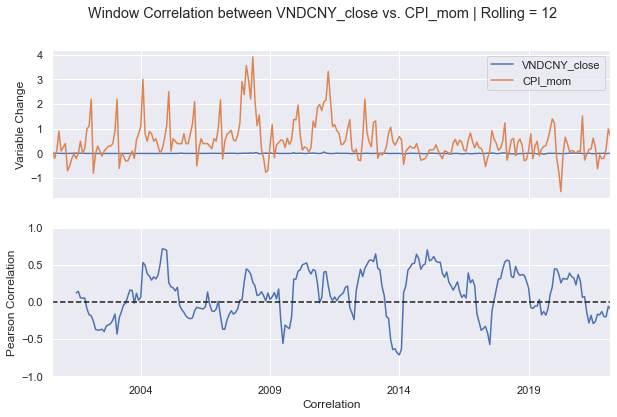

In [40]:
vndcny_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "VNDCNY_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [41]:
list_correlation.append(vndcny_cpi_corr)

### vnindex vs cpi

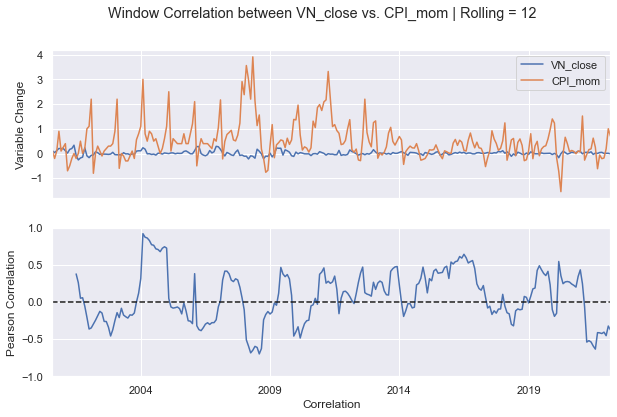

In [42]:
vni_cpi_corr = plot_windowCorrelation(data_monthly_pctChange, "VN_close", "CPI_mom", name_plot = None, r_window_size = 12)

In [43]:
list_correlation.append(vni_cpi_corr)

### gov bond vs cpi

In [44]:
data_monthly_bond_macro = data_monthly_all[['10y_yield', 'CPI_mom']]
data_monthly_bond_macro['10y_yield'] = data_monthly_bond_macro['10y_yield'].pct_change()
data_monthly_bond_macro.index = pd.DatetimeIndex(data_monthly_bond_macro.index)
data_monthly_bond_macro.index = data_monthly_bond_macro.index.to_period("M")
data_monthly_bond_macro = data_monthly_bond_macro.dropna()

<ipython-input-44-c636c6a5dc70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_monthly_bond_macro['10y_yield'] = data_monthly_bond_macro['10y_yield'].pct_change()


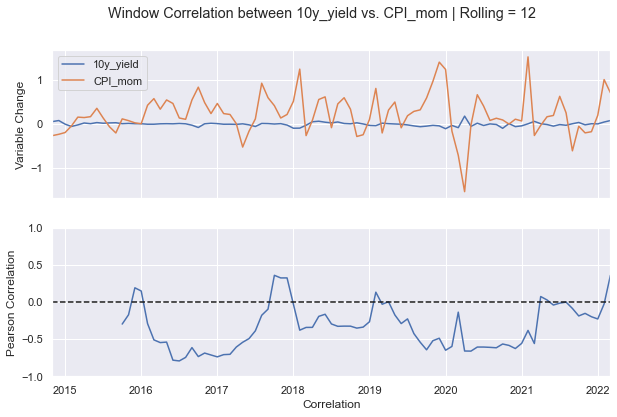

In [45]:
vnbond_cpi_corr = plot_windowCorrelation(data_monthly_bond_macro, "10y_yield", "CPI_mom", name_plot = None, r_window_size = 12)

In [46]:
list_correlation.append(vnbond_cpi_corr)

In [125]:
len(list_correlation)

19

In [126]:
from functools import reduce
corr_frame = reduce(lambda df1, df2: pd.merge(df1,df2, left_index=True, right_index=True, how = 'outer'), list_correlation)

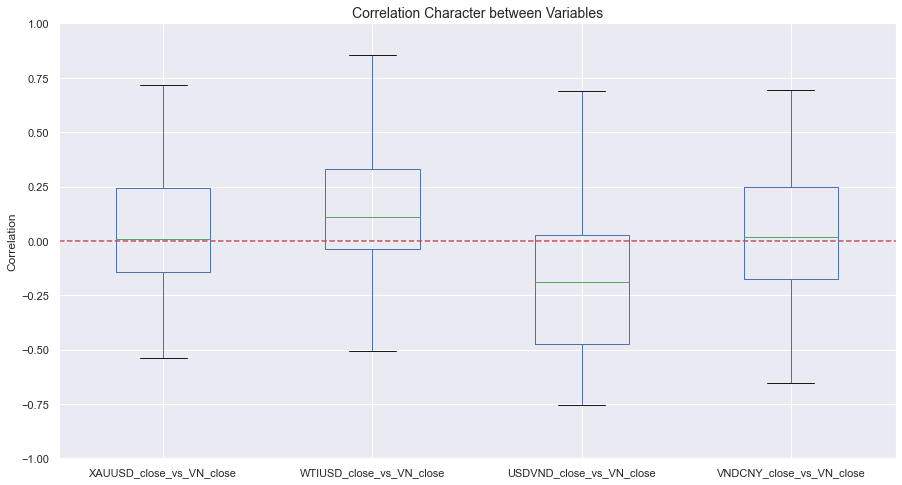

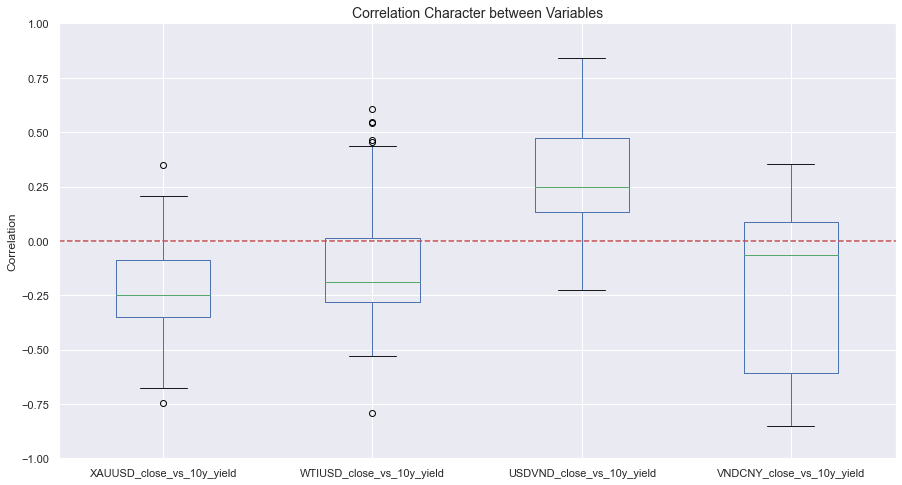

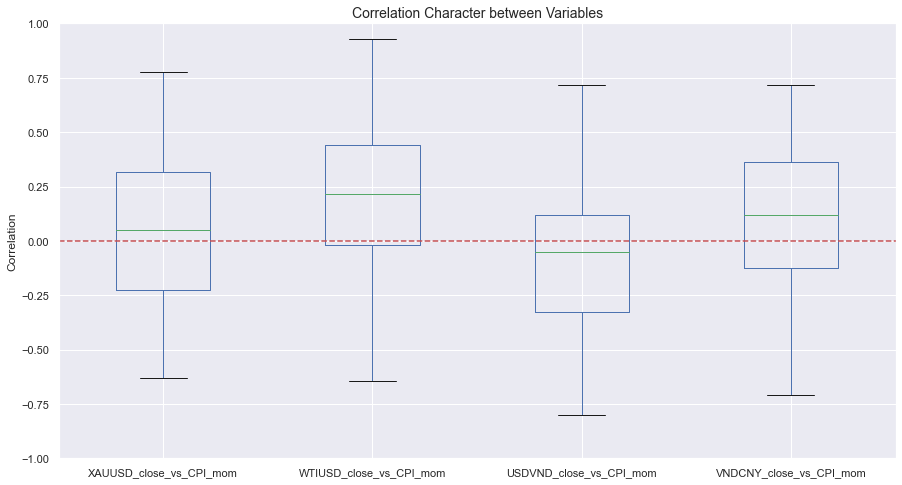

In [131]:
box_plot_corr(corr_frame[['XAUUSD_close_vs_VN_close', 'WTIUSD_close_vs_VN_close',
                          'USDVND_close_vs_VN_close', 'VNDCNY_close_vs_VN_close',
                          'XAUUSD_close_vs_10y_yield', 'WTIUSD_close_vs_10y_yield',
                          'USDVND_close_vs_10y_yield', 'VNDCNY_close_vs_10y_yield',
                          'XAUUSD_close_vs_CPI_mom', 'WTIUSD_close_vs_CPI_mom',
                          'USDVND_close_vs_CPI_mom', 'VNDCNY_close_vs_CPI_mom'
                          ]],n_box = 4)

# plot Corr only

In [132]:
corr_frame.columns

Index(['WTIUSD_close_vs_USDVND_close', 'WTIUSD_close_vs_VNDCNY_close',
       'XAUUSD_close_vs_USDVND_close', 'XAUUSD_close_vs_VNDCNY_close',
       'WTIUSD_close_vs_VN_close', 'XAUUSD_close_vs_VN_close',
       'XAUUSD_close_vs_10y_yield', 'WTIUSD_close_vs_10y_yield',
       'USDVND_close_vs_10y_yield', 'VNDCNY_close_vs_10y_yield',
       'VN_close_vs_10y_yield', 'XAUUSD_close_vs_CPI_mom',
       'WTIUSD_close_vs_CPI_mom', 'USDVND_close_vs_CPI_mom',
       'VNDCNY_close_vs_CPI_mom', 'VN_close_vs_CPI_mom',
       '10y_yield_vs_CPI_mom', 'USDVND_close_vs_VN_close',
       'VNDCNY_close_vs_VN_close'],
      dtype='object')

<AxesSubplot:xlabel='date'>

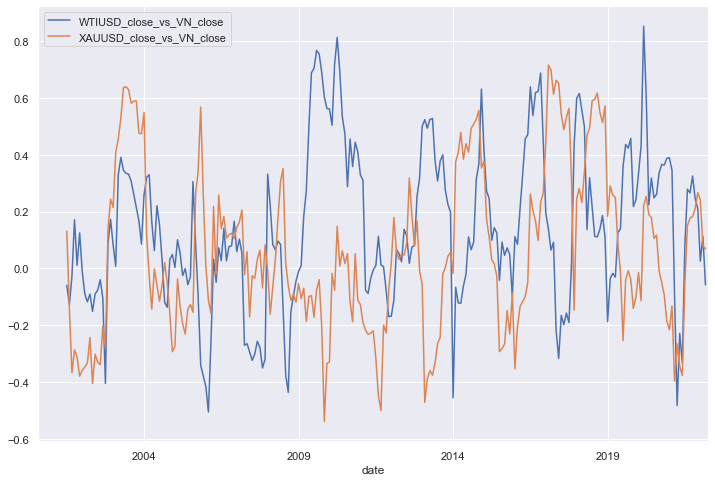

In [53]:
corr_frame[['WTIUSD_close_vs_VN_close', 'XAUUSD_close_vs_VN_close']].plot(figsize = (12,8))

In [188]:
# def plotOnEvent(frame, columns):
#     """plot graph on defined event

#     Args:
#         frame (DataFrame): frame to plot
#         columns (list): list of column to plot
#     """
#     from matplotlib.dates import date2num
#     from datetime import datetime
#     test = frame.copy()
#     test.index = test.index.to_timestamp()
#     fig, ax = plt.subplots(figsize=(12,8))
#     ax.plot(test.index,test[columns])
#     # test.plot(figsize = (12,8), ax = ax)
#     ax.axvspan(date2num(datetime(2008,1,12)), date2num(datetime(2010,6,1)), # datetime(2007,1,12)), date2num(datetime(2009,6,1)
#             label="2009 Recession", color="gray", alpha=0.3)
#     ax.axvspan(date2num(datetime(2011,5,1)), date2num(datetime(2012,7,1)),  # datetime(2010,5,1)), date2num(datetime(2011,7,1)
#             label="Sovereign Debt in Europe", color="gray", alpha=0.3)
#     ax.axvspan(date2num(datetime(2016,1,1)), date2num(datetime(2016,12,31)), # datetime(2015,1,1)), date2num(datetime(2015,12,31)
#             label="China capital ouflow", color="gray", alpha=0.3)
#     ax.axvspan(date2num(datetime(2017,10,1)), date2num(datetime(2017,11,3)), # datetime(2016,10,1)), date2num(datetime(2016,11,3)
#             label="OPEC cut oil supply", color="gray", alpha=0.3)
#     ax.axvspan(date2num(datetime(2018,1,1)), date2num(datetime(2019,1,1)), # datetime(2017,1,1)), date2num(datetime(2018,1,1)
#             label="DXY drop", color="gray", alpha=0.3)
#     ax.axvspan(date2num(datetime(2019,7,6)), date2num(datetime(2021,1,13)), # datetime(2018,7,6)), date2num(datetime(2020,1,13)
#             label="2009 Recession", color="gray", alpha=0.3)
#     ax.axvspan(date2num(datetime(2020,12,31)), date2num(datetime(2021,12,31)), # datetime(2019,12,31)), date2num(datetime(2021,12,31)
#             label="2009 Recession", color="gray", alpha=0.3)
#     ax.legend(columns)
#     plt.show();
#     return

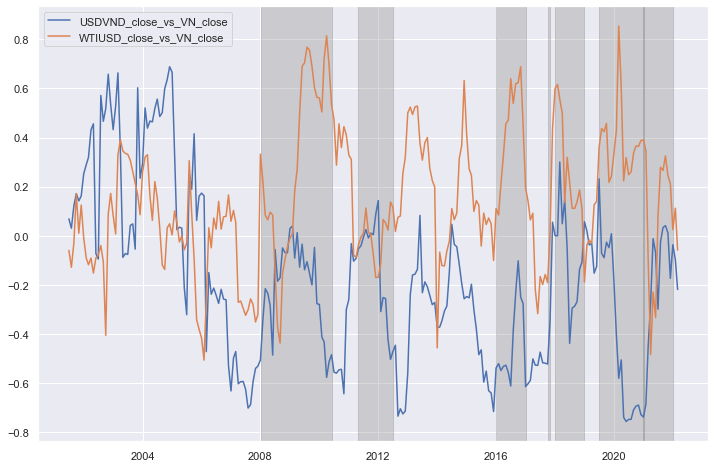

In [189]:
plotOnEvent(corr_frame, ['USDVND_close_vs_VN_close', 'WTIUSD_close_vs_VN_close'])

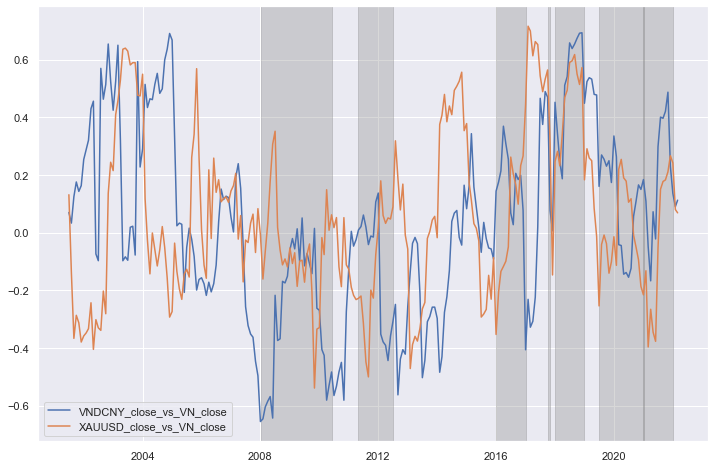

In [190]:
plotOnEvent(corr_frame, ['VNDCNY_close_vs_VN_close', 'XAUUSD_close_vs_VN_close'])

In [ ]:
# corr_frame[['XAUUSD_close_vs_10y_yield', 'WTIUSD_close_vs_10y_yield']].dropna().plot(figsize = (12,8))
plotOnEvent(corr_frame.dropna(), ['XAUUSD_close_vs_10y_yield', 'WTIUSD_close_vs_10y_yield'])

<AxesSubplot:xlabel='date'>

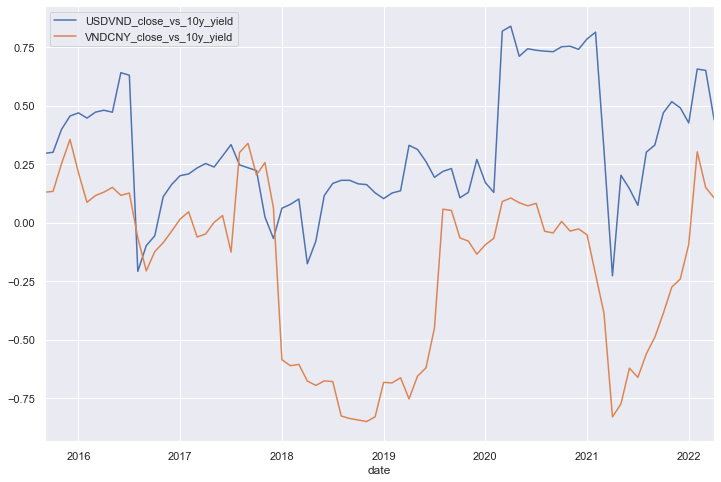

In [54]:
corr_frame[['USDVND_close_vs_10y_yield', 'VNDCNY_close_vs_10y_yield']].dropna().plot(figsize = (12,8))

<AxesSubplot:xlabel='date'>

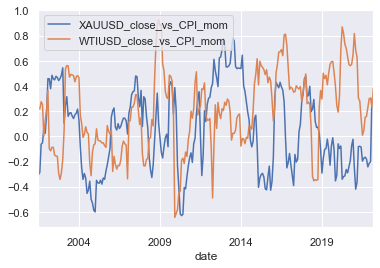

In [164]:
corr_frame[['XAUUSD_close_vs_CPI_mom','WTIUSD_close_vs_CPI_mom']].dropna().plot()

In [161]:
test = corr_frame[['XAUUSD_close_vs_CPI_mom','WTIUSD_close_vs_CPI_mom']].dropna()
test.index = test.index.to_timestamp()


<AxesSubplot:xlabel='date'>

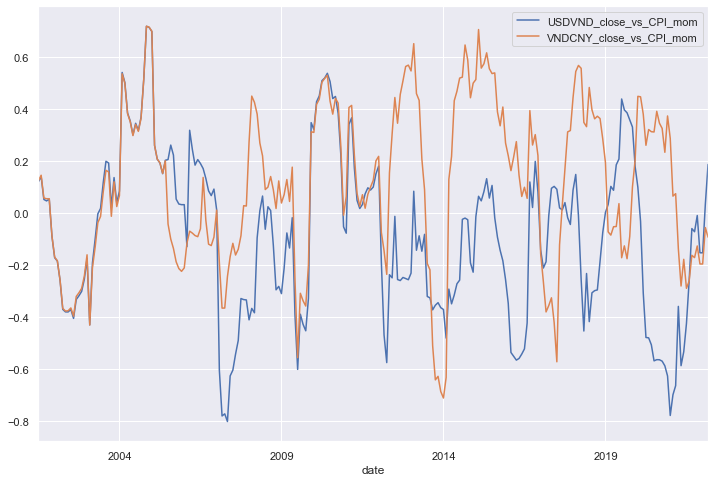

In [56]:
corr_frame[['USDVND_close_vs_CPI_mom','VNDCNY_close_vs_CPI_mom',]].dropna().plot(figsize = (12,8))

## Clustering

In [59]:
event = [
    [2007, 2010], # GFC
    [2010, 2011], # Sovereign debt in Europe
    [2015, 2018], # 3 events 
                    ## 2015 Fed increased rate, capital outflow from China, China Yuan devaluated
                    ## 2015 US Shale oil increased 
                    ## 2016 OPEC Cut oil
                    ## 2016 SBV Centered exchange rate 
                    ## 2017 5 bil USD inflow due to Sabeco deal + DXY decreased due to Trump policy  
    [2018, 2019], # Trade war > USDVND and USDCNY increased
    [2020, 2022]  # 2019-2021 Covid 19 Pandemic
                  # 2020 Covid-19 reduce oil demand
                  # 2022 Russia vs Ukraine
]

In [117]:
def k_cluster(dataframe, n_cluster = 3):
    """For cluster the covariance or correlation matrix

    Args:
        dataframe (pandas df): correlation matrix

    Returns:
        data frame: [description]
    """
    cluster_etf = []
    from sklearn.cluster import KMeans
    # Clustering
    kmeans = KMeans(n_clusters = n_cluster, random_state = 42).fit(dataframe.values)
    # label = kmeans.fit_predict(dataframe.values)
    # u_labels = np.unique(label)
    
    frame = pd.DataFrame(np.array([np.array(kmeans.labels_), np.array(dataframe.index.values)]).T, columns = ['label', 'components'])
    
    # print group
    for g in np.unique(kmeans.labels_):
        print(frame.groupby('label').get_group(g))

    
    return kmeans, frame
# km, frame = k_cluster(data_monthly_pctChange)

In [119]:
cluster_result = list()
for years in event:
    print(years)
    if years[0] < 2014:
        data_cache = data_monthly_pctChange.loc[str(years[0]):str(years[1])].corr()
    elif years[0] >= 2014:
        data_cache = data_monthly_all_pctChange.loc[str(years[0]):str(years[1])].corr()
    _, cluster_frame = k_cluster(data_cache)
    print(data_cache)
    
    cluster_result.append(cluster_frame)
        

[2007, 2010]
  label components
4     0   VN_close
  label    components
0     1  USDVND_close
1     1  VNDCNY_close
  label    components
2     2  WTIUSD_close
3     2  XAUUSD_close
5     2       CPI_mom
              USDVND_close  VNDCNY_close  WTIUSD_close  XAUUSD_close  \
USDVND_close      1.000000      0.857466     -0.149432     -0.146193   
VNDCNY_close      0.857466      1.000000      0.004413     -0.017452   
WTIUSD_close     -0.149432      0.004413      1.000000      0.170545   
XAUUSD_close     -0.146193     -0.017452      0.170545      1.000000   
VN_close         -0.212112     -0.304954      0.271702     -0.033597   
CPI_mom          -0.133150      0.162845      0.282788      0.021790   

              VN_close   CPI_mom  
USDVND_close -0.212112 -0.133150  
VNDCNY_close -0.304954  0.162845  
WTIUSD_close  0.271702  0.282788  
XAUUSD_close -0.033597  0.021790  
VN_close      1.000000 -0.202617  
CPI_mom      -0.202617  1.000000  
[2010, 2011]
  label    components
3     0  X

In [112]:
data_monthly_all_pctChange.loc['2015':'2016']


,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,10y_yield,CPI_mom
date,,,,,,,
2015-01,-0.000739,-0.005393,-0.207837,0.048117,0.040954,-0.010043,-0.20
2015-02,-0.002293,-0.007435,0.077188,-0.018435,0.014090,-0.062069,-0.05
2015-03,0.006265,0.008270,-0.054328,-0.044125,-0.002719,-0.026823,0.15
2015-04,0.007062,0.013081,0.128480,0.017076,-0.035839,0.016288,0.14
2015-05,0.007265,0.006928,0.101077,0.000031,-0.009798,0.001216,0.16
2015-06,0.002846,0.002548,0.005565,-0.014453,0.054300,0.025685,0.35
2015-07,0.000245,-0.000229,-0.148223,-0.045164,0.074956,0.011304,0.13
2015-08,0.016154,-0.004708,-0.158141,-0.008370,-0.071837,0.018098,-0.07
2015-09,0.015366,0.010503,0.057221,0.005034,-0.024850,0.022374,-0.21


In [98]:
frame.groupby('label').get_group(2)

,label,components
3,2,2000-11
6,2,2001-02
13,2,2001-09
16,2,2001-12
17,2,2002-01
...,...,...
239,2,2020-07
246,2,2021-02
251,2,2021-07
258,2,2022-02


<AxesSubplot:xlabel='components'>

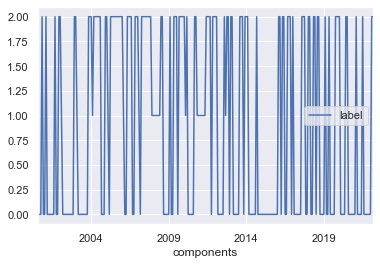

In [105]:
test = frame.copy()
test = test.set_index('components')
test.index = test.index.to_timestamp()
test.plot()

In [158]:
test

,label
components,
2000-08-01,0
2000-09-01,0
2000-10-01,0
2000-11-01,2
2000-12-01,0
...,...
2021-11-01,0
2021-12-01,0
2022-01-01,0


# Singular Spectrum Analysis Decomposition

In [58]:
from pyts.decomposition import SingularSpectrumAnalysis
transformer = SingularSpectrumAnalysis(window_size=4)
data_new = transformer.transform(data_monthly_all_pctChange)

ModuleNotFoundError: No module named 'pyts.decomposition'

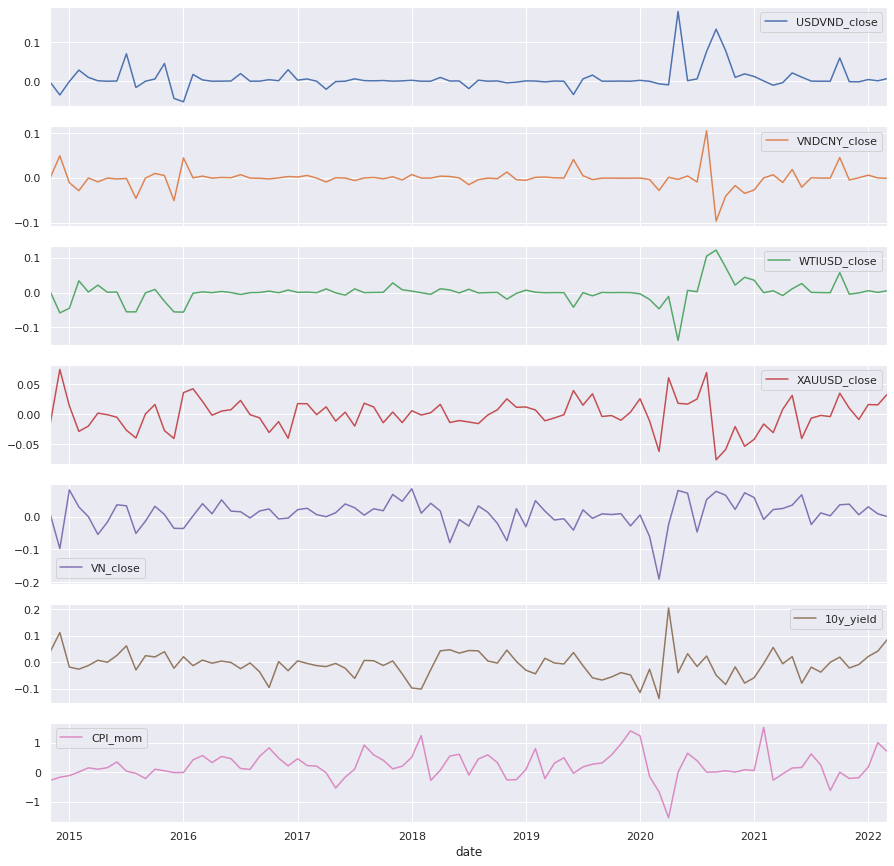

In [ ]:
data_information = pd.DataFrame(data=data_new[:,0,:], columns=data_monthly_all_pctChange.columns, index=data_monthly_all_pctChange.index)
data_information.plot(subplots = True, figsize = (15, 15));

In [ ]:
#data_monthly_all_pctChange.plot(subplots = True, figsize = (15, 15)); 

In [ ]:
data_information.corr()

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,10y_yield,CPI_mom
USDVND_close,1.000000,-0.147324,0.203240,-0.166243,0.441207,-0.150696,-0.025297
VNDCNY_close,-0.147324,1.000000,-0.086762,0.736527,-0.074280,0.376004,0.029702
WTIUSD_close,0.203240,-0.086762,1.000000,-0.186647,0.353421,-0.118355,0.091663
XAUUSD_close,-0.166243,0.736527,-0.186647,1.000000,-0.062078,0.474855,0.007362
VN_close,0.441207,-0.074280,0.353421,-0.062078,1.000000,-0.145969,0.134167
10y_yield,-0.150696,0.376004,-0.118355,0.474855,-0.145969,1.000000,-0.320863
CPI_mom,-0.025297,0.029702,0.091663,0.007362,0.134167,-0.320863,1.000000


In [ ]:
data_monthly_all_pctChange.corr()

,USDVND_close,VNDCNY_close,WTIUSD_close,XAUUSD_close,VN_close,10y_yield,CPI_mom
USDVND_close,1.000000,0.029100,-0.155195,-0.310619,-0.355142,0.283760,-0.133676
VNDCNY_close,0.029100,1.000000,0.320902,0.125428,0.286617,-0.228472,0.112255
WTIUSD_close,-0.155195,0.320902,1.000000,-0.038329,0.279316,-0.149124,0.452249
XAUUSD_close,-0.310619,0.125428,-0.038329,1.000000,0.046171,-0.020867,-0.014580
VN_close,-0.355142,0.286617,0.279316,0.046171,1.000000,-0.196738,0.085500
10y_yield,0.283760,-0.228472,-0.149124,-0.020867,-0.196738,1.000000,-0.328629
CPI_mom,-0.133676,0.112255,0.452249,-0.014580,0.085500,-0.328629,1.000000
